In [1]:
import json
import numpy as np
from collections import defaultdict, Counter
import string
from sklearn import linear_model
import sys
import nltk
from nltk.corpus import stopwords 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yaojunyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import spacy

In [4]:
f = open('Sports_and_Outdoors_5_2018.json','r').read()

In [5]:
type(f)

str

In [6]:
f_name = "Sports_and_Outdoors_5_2018.json"
all_data = []
with open(f_name, 'r') as f:
    line = f.readline()
    #print(line)
    while line:
        data = json.loads(line)
        all_data.append(data)
        line = f.readline()

In [7]:
all_data = all_data[:60000]

In [8]:
print(len(all_data))

60000


In [13]:
for i in all_data:
    if 'reviewText' not in i.keys() or 'overall' not in i.keys() or not i['reviewText'] or not i['overall']:
        all_data.remove(i)

In [14]:
print(len(all_data))

59981


In [15]:
def only_adj_and_noun(all_data):
    bigramCount = defaultdict(int)
    uniCount = defaultdict(int)
    punctuation = set(string.punctuation)
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    nlp=spacy.load("en_core_web_sm")

    review_text = []
    for d in all_data:
        #r = ''.join([c for c in d['reviewText'].lower() if not c in discard_set])
        r = d['reviewText'].translate(translator).lower()
        r = [word for word in r.split() if word not in stop_words and not word.isdigit()]
        #r = [word for word in r.split() if word not in stop_words and not word.isdigit()and word.pos_in("NOUN","ADJ")]
        review_text.append(" ".join(r))
        if r:
            prev = r[0]
            for i in range(1, len(r)):
                bigram = prev + " " + r[i]
                uniCount[r[i]] += 1
                bigramCount[bigram] += 1
                prev = r[i]
            uniCount[r[0]] += 1
    return uniCount, bigramCount, review_text

In [16]:
uni_count, bi_count, review_text = only_adj_and_noun(all_data)

In [17]:
print(len(bi_count), len(uni_count))

685541 42761


In [18]:
def feature(text, bigrams, bigramId):
    feat = [0]*len(bigrams)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[bigramId[bigram]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [19]:
countsBigram = [(bi_count[d], d) for d in bi_count.keys()]
countsBigram.sort()
countsBigram.reverse()

In [20]:
bigrams = [c[1] for c in countsBigram[:1000]]
bigramId = dict(zip(bigrams, range(len(bigrams))))
bigramSet = set(bigrams)

In [21]:
print(review_text[1])

heck tutu nuns know cut still also arent several layers tutu making poof lays flat needless say returned


In [22]:
X_2 = []
for i in range(len(all_data)):
    X_2.append(feature(review_text[i], bigrams, bigramId))
y_2 = [d['overall'] for d in all_data]

In [23]:
reg = 1.0
clf_bi = linear_model.Ridge(reg, fit_intercept=False)
clf_bi.fit(X_2, y_2)
theta_bi = clf_bi.coef_
pred_bi = clf_bi.predict(X_2)

In [24]:
max_index = np.argsort(theta_bi)[-100:][::-1]
print(len(theta_bi[max_index]))
print(theta_bi[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_bigram = np.array(bigrams)[max_index - 1]
print(tmp_bigram)


100
[4.37837121 0.65052701 0.55151024 0.47264764 0.47115039 0.46466042
 0.46128023 0.45197375 0.44594606 0.44586798 0.44252413 0.43535781
 0.43262845 0.43008933 0.42685933 0.41617749 0.40995513 0.40980535
 0.39967301 0.39879364 0.39772409 0.39608995 0.3927771  0.39076066
 0.38887657 0.38205296 0.38071326 0.38037936 0.37997402 0.37887525
 0.3706349  0.37047105 0.36845138 0.36653352 0.36398085 0.36129161
 0.35791874 0.35445136 0.34701177 0.34624245 0.34472859 0.34452446
 0.34448355 0.33933154 0.33756708 0.33674003 0.33434761 0.33358729
 0.33176077 0.33081967 0.32882693 0.32861501 0.32716187 0.32647272
 0.32593933 0.32571964 0.32532801 0.32354127 0.32318879 0.32282189
 0.32181587 0.32101307 0.31996109 0.31957148 0.31934297 0.31843236
 0.31716503 0.3137552  0.31172744 0.31052926 0.30715372 0.30477442
 0.30231764 0.30194991 0.30094994 0.30024673 0.29962047 0.29948281
 0.29777712 0.2974511  0.29665469 0.2961826  0.29530206 0.29497601
 0.29482342 0.29458113 0.29451513 0.29270918 0.29201989 0.

In [25]:
bi_dictionary = {}
for i in range(len(tmp_bigram)):
    bi_dictionary[tmp_bigram[i]]=theta_bi[max_index][i]

In [26]:
bi_dictionary['daily use']

0.38037935981919907

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import numpy as np
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
x=np.array(['little smaller','cast iron','large hands','physical therapist','fair price'])
y=np.array([4.378,0.552,0.473,0.452,0.446])
plt.bar(x,y)
plt.xlabel("")
plt.ylabel('Weight')
plt.show()

<Figure size 4800x2400 with 1 Axes>

#######################

In [28]:
countsUnigram = [(uni_count[w], w) for w in uni_count]
countsUnigram.sort()
countsUnigram.reverse()

In [29]:
unigrams = [x[1] for x in countsUnigram[:1000]]
unigramId = dict(zip(unigrams, range(len(unigrams))))
unigramSet = set(unigrams)

In [30]:
def feature_2(text, unigrams, unigramId):
    feat = [0]*len(unigrams)
    words = text.split()
    for i in words:
        #bigram = words[i] + " " + words[i+1]
        try:
            feat[unigramId[i]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [31]:
def feature_3(text):
    feat = [0]*len(combineds)
    words = text.split()
    for i in range(len(words)-1):
        bigram = words[i] + " " + words[i+1]
        try:
            feat[combinedId[bigram]] += 1
        except KeyError:
            continue
    for w in words:
        try:
            feat[combinedId[w]] += 1
        except KeyError:
            continue
    feat.append(1) #offset
    return feat

In [32]:
X_uni = []
for i in range(len(all_data)):
    X_uni.append(feature_2(review_text[i], unigrams, unigramId))
y_uni = [d['overall'] for d in all_data]

In [33]:
print(len(X_uni), len(y_uni))

59981 59981


In [34]:
reg = 1.0
clf_uni = linear_model.Ridge()
clf_uni.fit(X_uni, y_uni)
theta_uni = clf_uni.coef_
pred_uni = clf_uni.predict(X_uni)

In [35]:
max_index = np.argsort(theta_uni)[-200:][::-1]
print(len(theta_uni[max_index]))
print(theta_uni[max_index])
#print(np.array(bigrams)[max_index - 1])
tmp_uni = np.array(unigrams)[max_index - 1]
print(tmp_uni)

200
[0.33791795 0.32316273 0.30467065 0.29899039 0.27610905 0.26889324
 0.26367328 0.25959392 0.25865773 0.25618227 0.24930643 0.24434474
 0.24021769 0.24019013 0.24001193 0.23736906 0.22780704 0.22535797
 0.21985661 0.2191687  0.21475607 0.21341608 0.21233073 0.2117592
 0.2067574  0.20482099 0.18679523 0.1860913  0.18494181 0.17515151
 0.17456212 0.17395107 0.16866779 0.16404296 0.16311407 0.16152086
 0.15791038 0.15690419 0.15681711 0.15492934 0.14972528 0.1491302
 0.1489347  0.14840535 0.14789884 0.14673444 0.14616684 0.14238548
 0.14225488 0.14148469 0.14118355 0.13923189 0.13765933 0.13557714
 0.13465867 0.13443178 0.13336946 0.13047593 0.12797043 0.12741879
 0.1263274  0.12404052 0.12278854 0.12218809 0.12131959 0.12098607
 0.11993363 0.11918101 0.11851331 0.11722436 0.11713186 0.11578841
 0.11474169 0.11355252 0.11340559 0.11218265 0.11217593 0.11114489
 0.11100633 0.11024839 0.10912088 0.1085218  0.10803129 0.10774193
 0.10693922 0.10651644 0.10414421 0.10411433 0.1031661  0.10

##### get low ratting data ####

In [36]:
########################################
#   not using for now                  #
########################################

# def get_bigrams(all_data, count):
#     bigramCount = defaultdict(int)
#     punctuation = set(string.punctuation)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         words = r.split()
#         for i in range(0,len(words)-1):
#             bigram = words[i] + " " + words[i+1]
#             bigramCount[bigram] += 1
#     countsBigram = [(bigramCount[d], d) for d in bigramCount.keys()]
#     countsBigram.sort()
#     countsBigram.reverse()
#     bigrams = [c[1] for c in countsBigram[:count]]
#     bigramId = dict(zip(bigrams, range(len(bigrams))))
#     bigramSet = set(bigrams)
#     return bigramId, bigramSet, countsBigram

# def get_unigrams(all_data, count):
#     unigramCount = defaultdict(int)
#     for d in all_data:
#         r = ''.join([c for c in d['reviewText'].lower() if not c in punctuation])
#         for w in r.split():
#             unigramCount[w] += 1
#     countsUnigram = [(unigramCount[w], w) for w in unigramCount]
#     countsUnigram.sort()
#     countsUnigram.reverse()
#     unigrams = [x[1] for x in countsUnigram[:count]]
#     unigramId = dict(zip(unigrams, range(len(unigrams))))
#     unigramSet = set(unigrams)
#     return unigramId, unigramSet, countsUnigram

# def get_training_data(all_data, review_text):
#     X = []
#     for i in range(len(all_data)):
#         X.append(feature_3(review_text[i]))
#     y = [d['overall'] for d in all_data]
#     return X, y

In [37]:
def data_by_low_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

low_ratings = data_by_low_rating(all_data, 1.0)
#reviewText_low = [''.join([c for c in datum['reviewText'].lower() if not c in punctuation]) for datum in low_ratings]

In [38]:
low_uni_count, low_bi_count, low_reviews = only_adj_and_noun(low_ratings)

In [39]:
low_uni_count, low_bi_count = Counter(low_uni_count), Counter(low_bi_count)

In [40]:
print(low_uni_count.most_common(50))

[('one', 643), ('would', 463), ('like', 377), ('use', 358), ('product', 330), ('get', 326), ('dont', 312), ('buy', 283), ('bought', 266), ('even', 263), ('time', 261), ('good', 259), ('first', 237), ('back', 236), ('made', 227), ('quality', 217), ('used', 209), ('im', 208), ('money', 199), ('got', 198), ('way', 198), ('two', 195), ('fit', 195), ('better', 191), ('work', 184), ('didnt', 183), ('much', 179), ('really', 172), ('could', 172), ('well', 170), ('cheap', 165), ('small', 165), ('size', 158), ('return', 155), ('also', 150), ('amazon', 150), ('put', 146), ('water', 138), ('thing', 137), ('doesnt', 137), ('gloves', 134), ('still', 129), ('bad', 125), ('old', 125), ('great', 124), ('broke', 123), ('waste', 122), ('make', 122), ('plastic', 117), ('right', 114)]


In [41]:
print(low_bi_count.most_common(50))

[('waste money', 84), ('dont buy', 54), ('first time', 52), ('dont know', 38), ('dont waste', 37), ('would recommend', 36), ('year old', 34), ('poor quality', 31), ('customer service', 30), ('cheaply made', 27), ('put together', 27), ('get pay', 26), ('looks like', 26), ('first use', 25), ('much better', 25), ('piece junk', 24), ('sent back', 24), ('one star', 24), ('made china', 22), ('buyer beware', 21), ('time used', 20), ('didnt work', 20), ('poorly made', 20), ('new one', 20), ('im sure', 19), ('mountain house', 19), ('waste time', 18), ('could get', 18), ('would work', 18), ('doesnt work', 18), ('one side', 18), ('save money', 18), ('didnt even', 17), ('quality control', 17), ('fell apart', 17), ('every time', 17), ('send back', 16), ('first one', 16), ('recommend product', 15), ('good quality', 15), ('ive ever', 15), ('im going', 15), ('even though', 15), ('broke first', 15), ('something else', 15), ('cheap plastic', 14), ('way small', 14), ('dont think', 14), ('didnt fit', 14),

In [42]:
low_dictionary = dict(low_bi_count.most_common(100))

In [45]:
f = ''
for i in low_dictionary.keys():
    temp = i * low_dictionary[i]
    f = f + temp

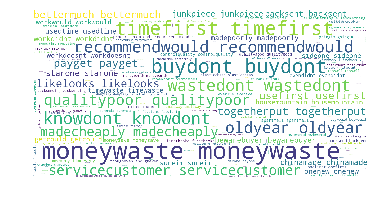

In [53]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1600, height=800, margin=2).generate(f)
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('test.png')

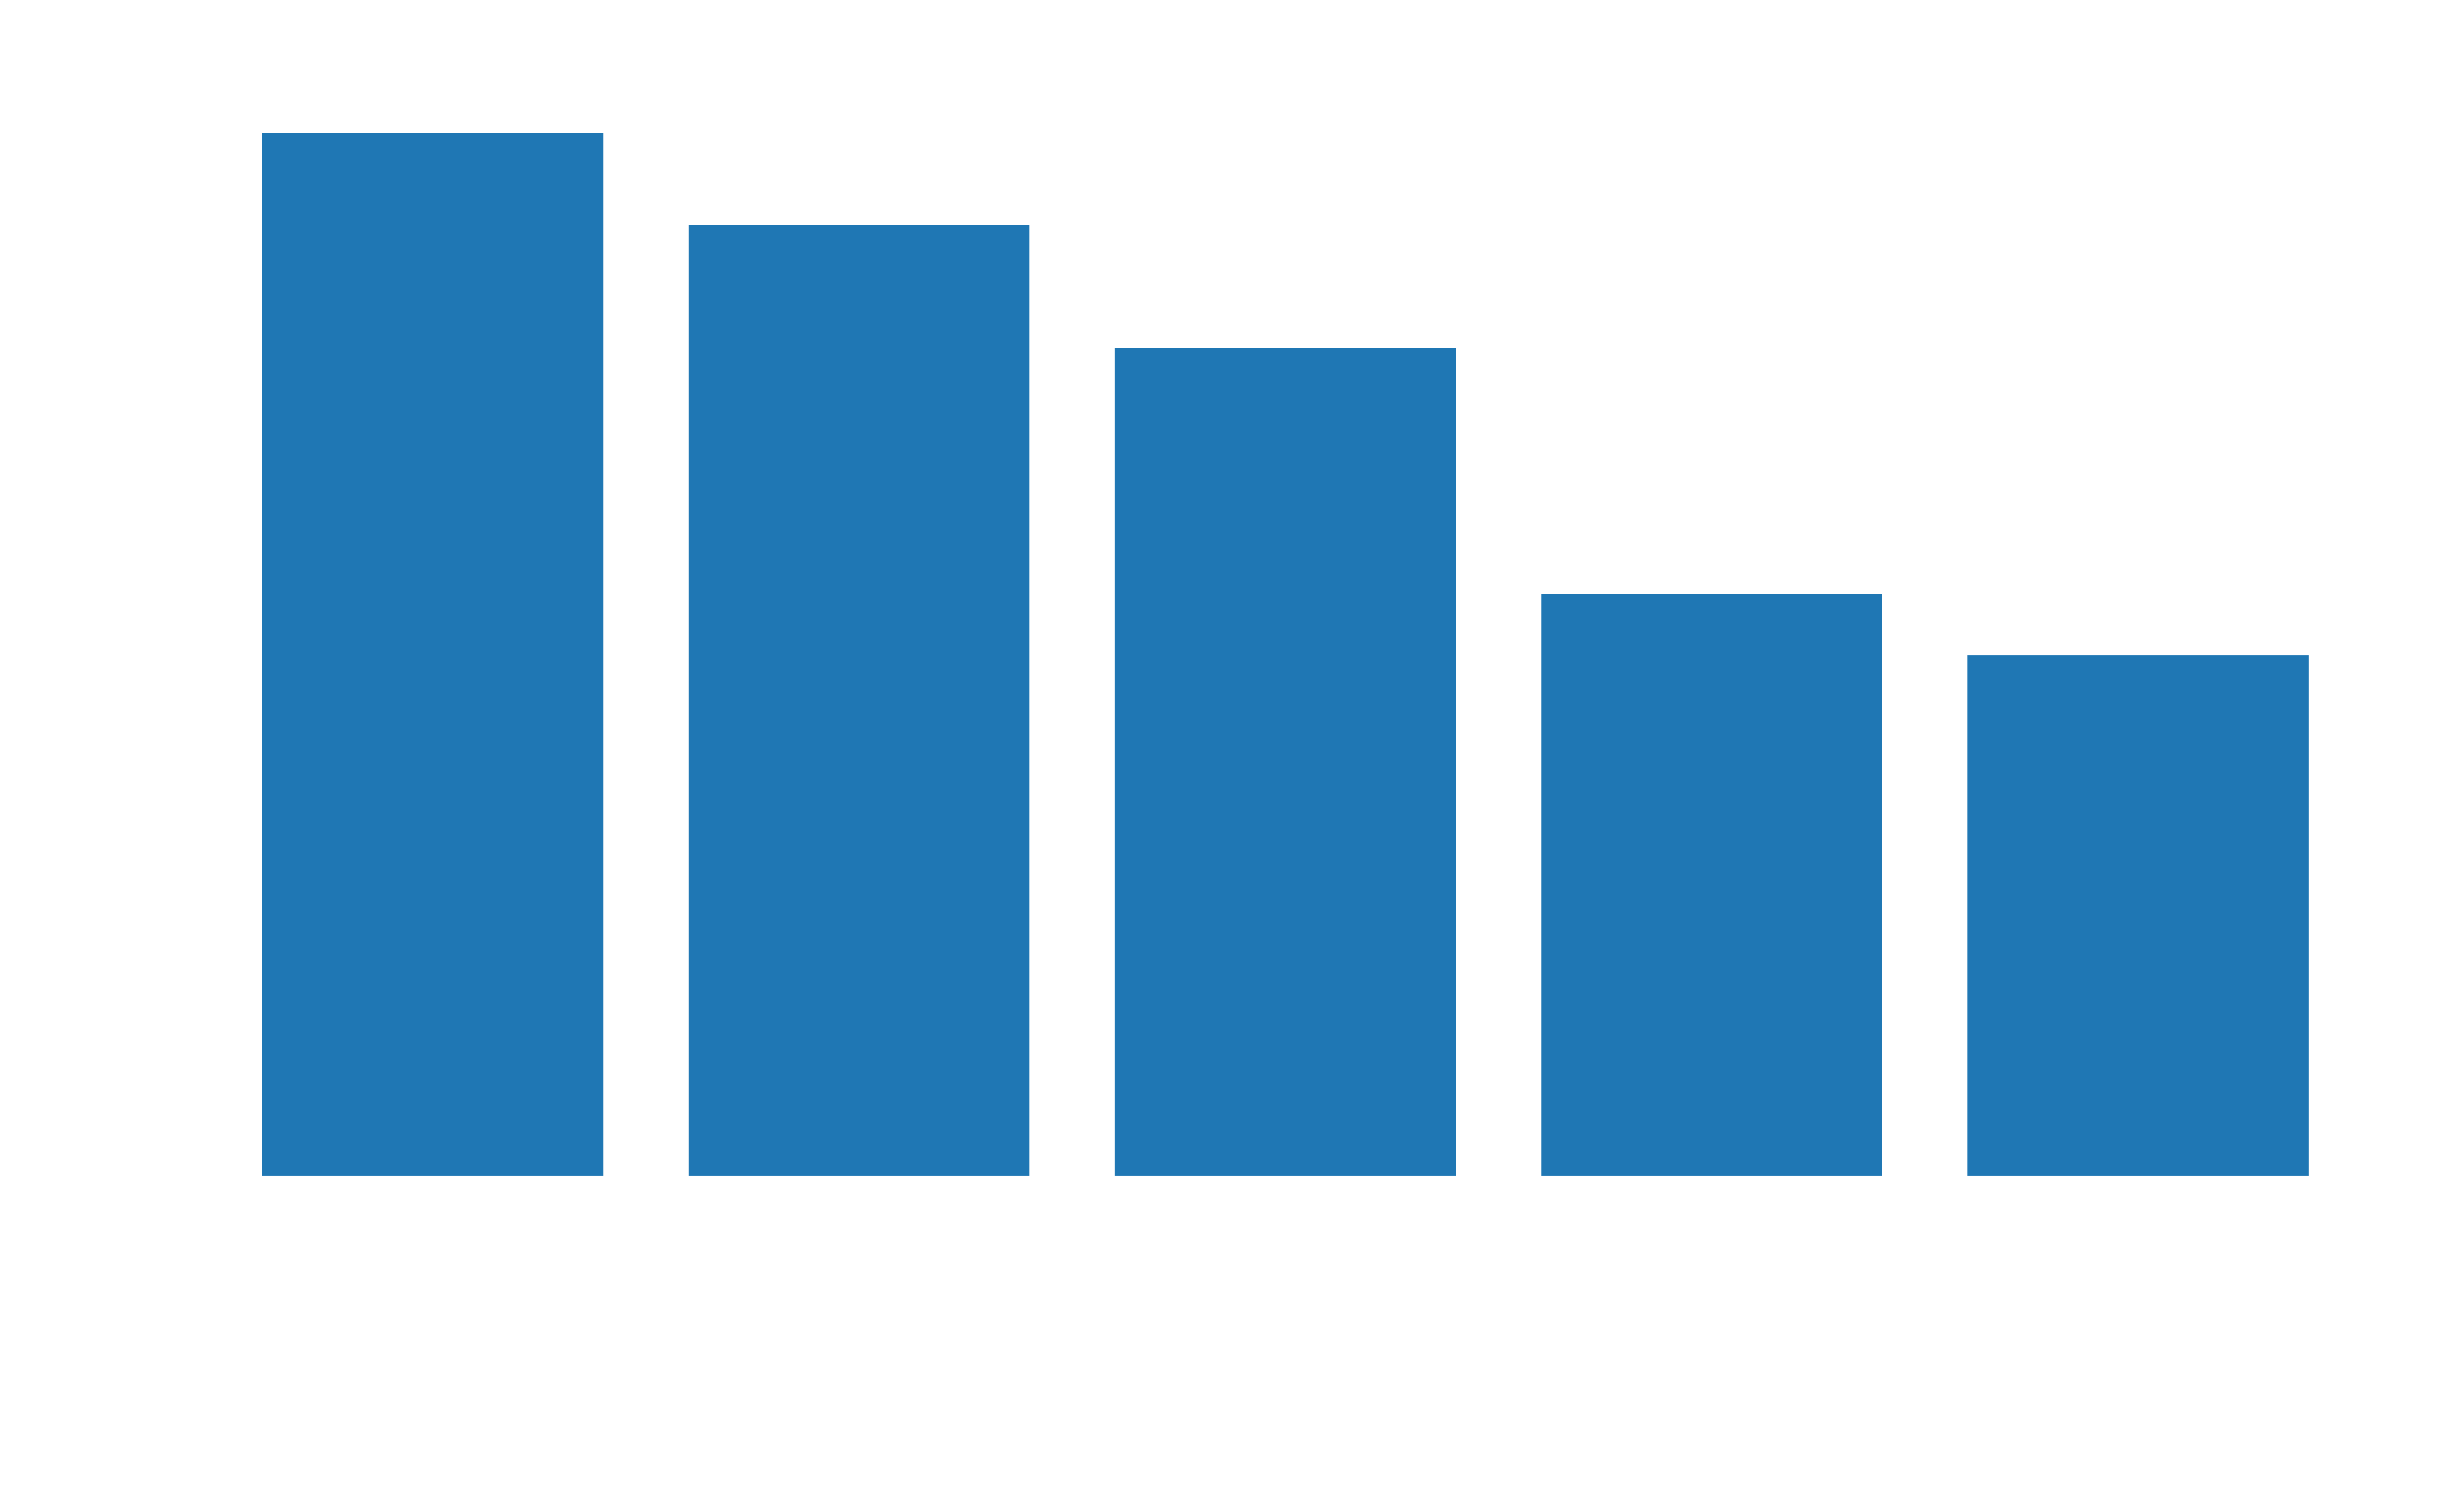

In [54]:
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'white'
matplotlib.rcParams['xtick.color'] = 'white'
matplotlib.rcParams['ytick.color'] = 'white'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(rotation = 45,weight = 'bold')
x_low=np.array(['year old','poor quality','cheaply made','mountain house','quality control'])
y_low=np.array([34,31,27,19,17])
plt.bar(x_low,y_low)
plt.title("Top 5 important words for low rating",color='white')
plt.xlabel('')
plt.ylabel('Frequency')
plt.show()

Get high rating data(5 stars)

In [36]:
def data_by_high_rating(all_data, rating):
    ratings_data = []
    for d in all_data:
        if d['overall'] == rating:
            ratings_data.append(d)
    #print(len(ratings_data))
    return ratings_data

high_ratings = data_by_high_rating(all_data, 5.0)

In [37]:
high_uni_count, high_bi_count, high_reviews = only_adj_and_noun(high_ratings)

In [38]:
high_uni_count, high_bi_count = Counter(high_uni_count), Counter(high_bi_count)

In [39]:
print(high_uni_count.most_common(50))

[('great', 13967), ('good', 8329), ('use', 7443), ('one', 7215), ('well', 6745), ('like', 5324), ('product', 4323), ('would', 4188), ('get', 4083), ('easy', 3932), ('works', 3889), ('love', 3784), ('quality', 3753), ('price', 3595), ('used', 3586), ('nice', 3509), ('really', 3358), ('bought', 3299), ('perfect', 3281), ('fit', 3241), ('time', 3213), ('work', 3039), ('little', 2913), ('dont', 2824), ('also', 2782), ('much', 2746), ('made', 2582), ('im', 2545), ('knife', 2444), ('buy', 2394), ('using', 2332), ('ive', 2315), ('recommend', 2239), ('size', 2229), ('years', 2208), ('need', 2192), ('got', 2186), ('best', 2129), ('even', 2080), ('better', 2055), ('long', 1989), ('water', 1984), ('go', 1930), ('back', 1927), ('still', 1908), ('keep', 1865), ('comfortable', 1835), ('put', 1801), ('small', 1775), ('enough', 1773)]


In [40]:
print(high_bi_count.most_common(50))

[('works great', 1322), ('great product', 1107), ('well made', 979), ('good quality', 834), ('highly recommend', 760), ('great price', 678), ('year old', 665), ('works well', 658), ('would recommend', 597), ('easy use', 590), ('high quality', 474), ('good product', 456), ('work great', 456), ('tennis elbow', 456), ('great quality', 428), ('good price', 413), ('long time', 409), ('mountain house', 390), ('light weight', 355), ('every day', 340), ('make sure', 339), ('much better', 332), ('work well', 312), ('years ago', 301), ('really like', 301), ('ive used', 300), ('would buy', 296), ('highly recommended', 277), ('go wrong', 259), ('worked great', 256), ('excellent product', 256), ('easy install', 237), ('perfect fit', 235), ('fits well', 228), ('fit great', 228), ('last long', 224), ('well worth', 223), ('swiss army', 223), ('really good', 222), ('perfect size', 220), ('fit well', 215), ('heavy duty', 212), ('cant beat', 210), ('great value', 207), ('dont know', 207), ('fast shipping

In [41]:
type(high_uni_count)

collections.Counter

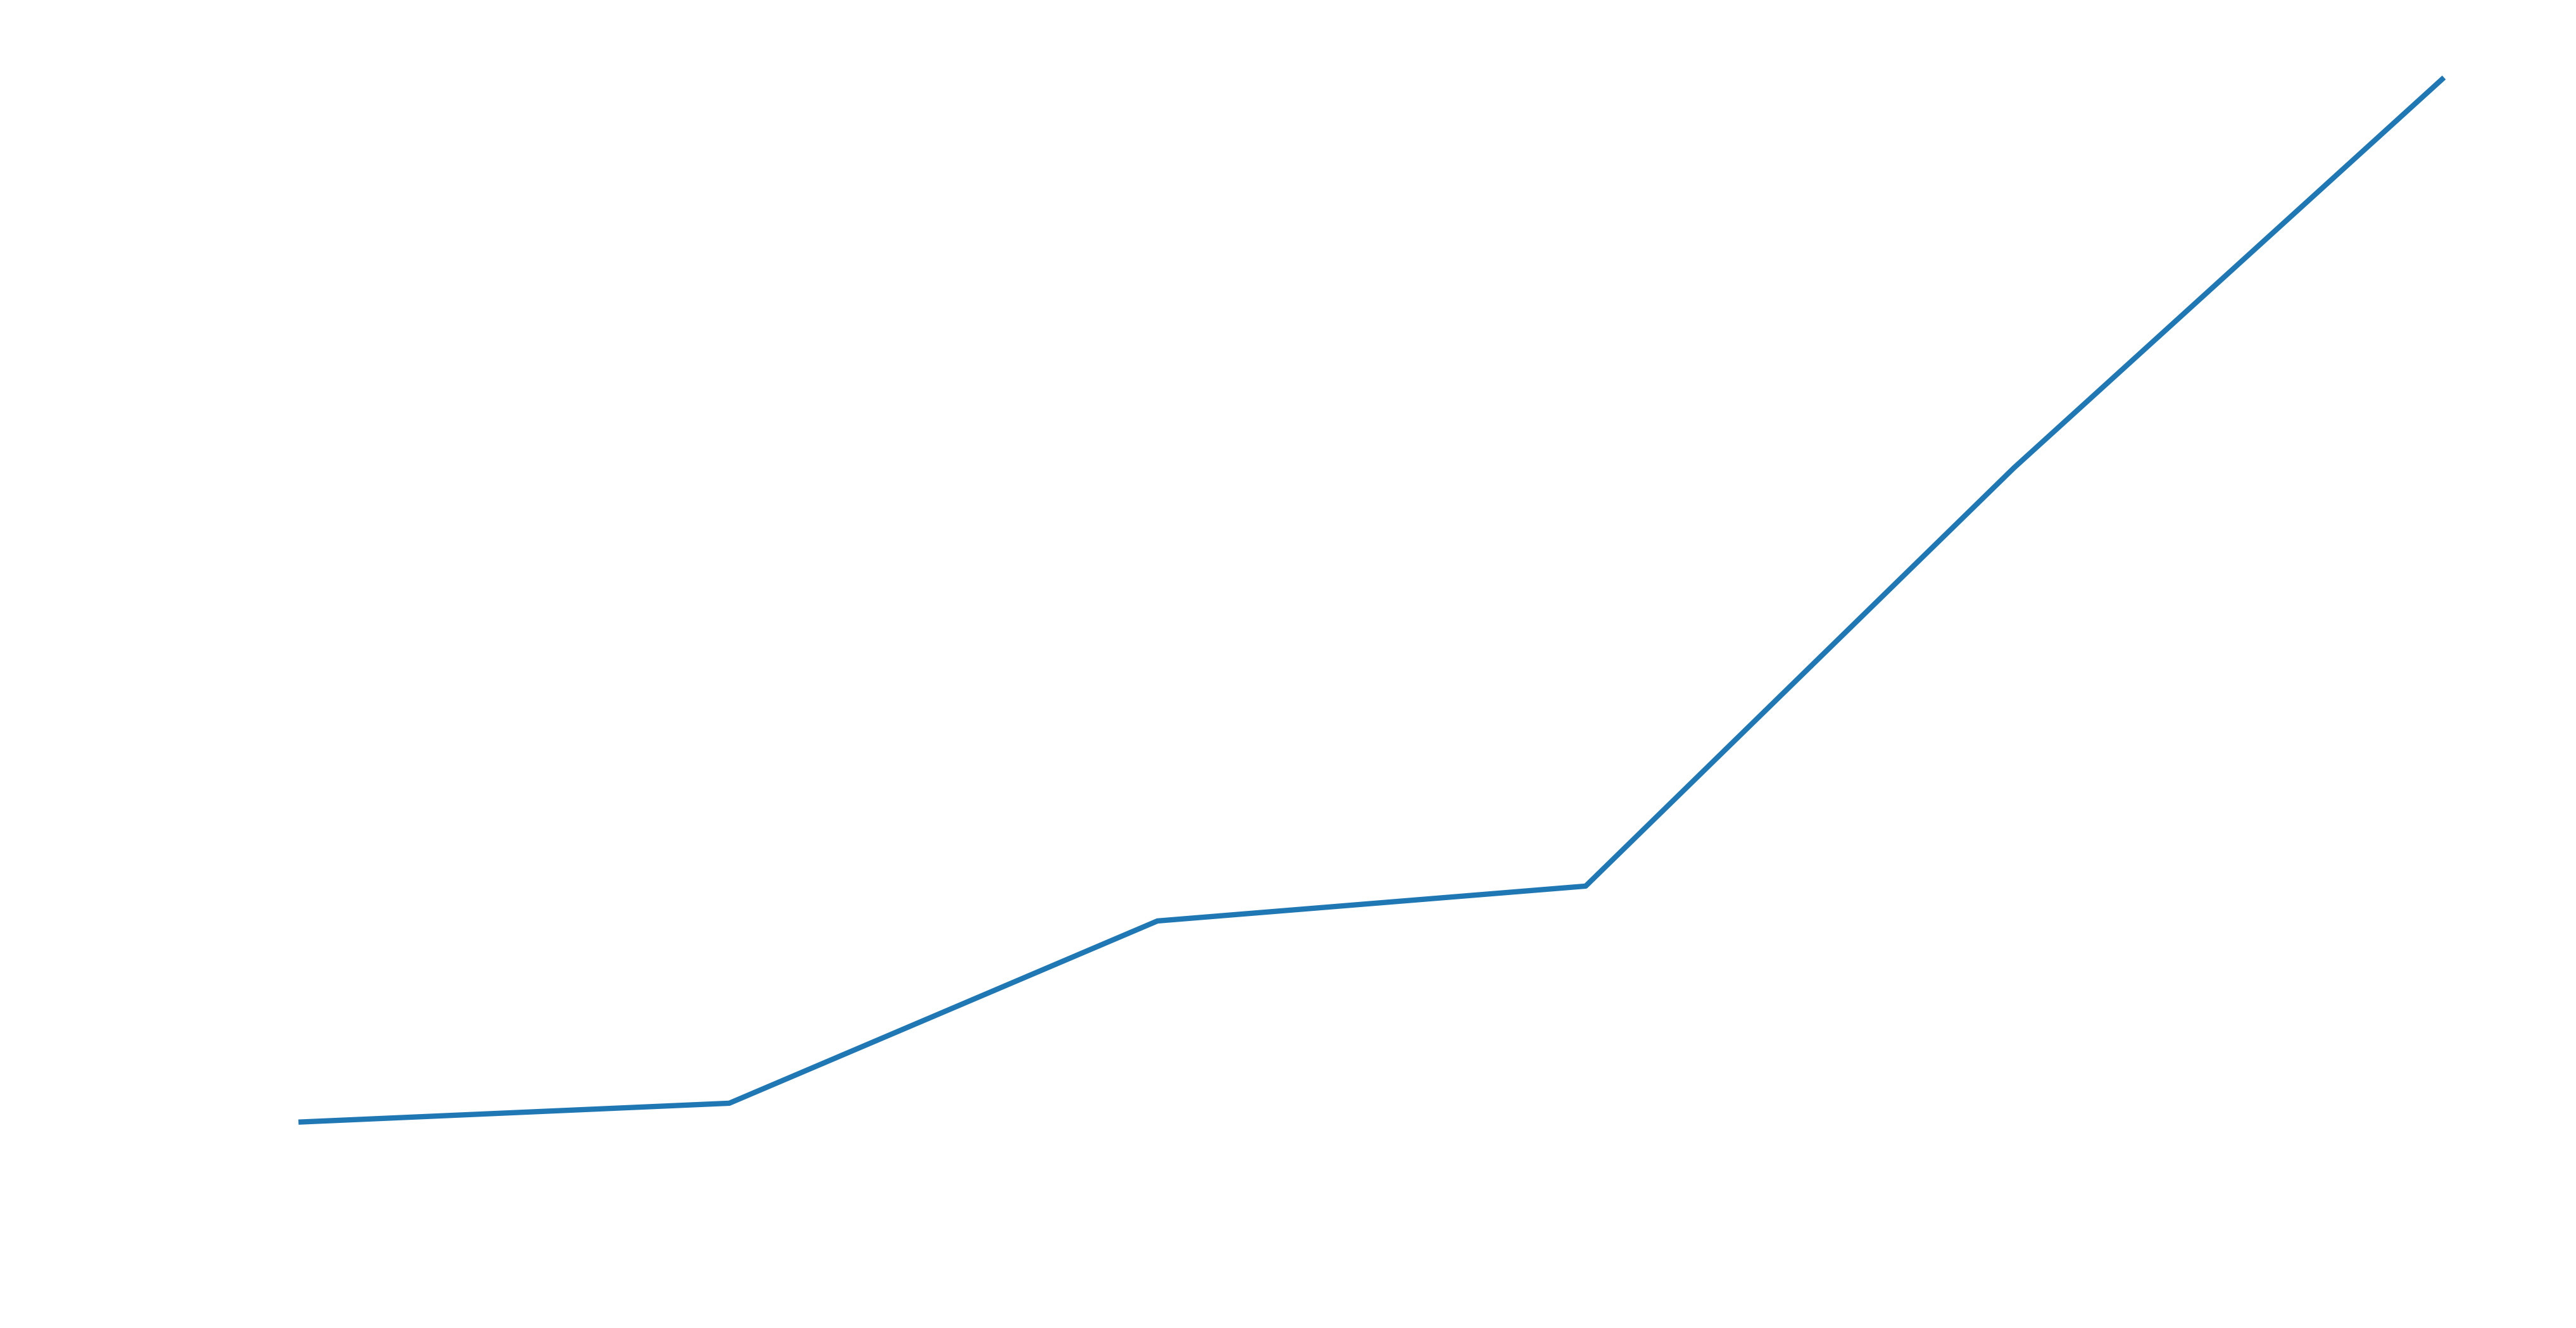

In [42]:
plt.figure(figsize=(12, 6))
x=np.array(['easy use','would recommend','year old','great price','good quality','well made'])
y=np.array([590,597,665,678,834,979])
plt.plot(x,y)
plt.xlabel('Top 6 important words for high rating')
plt.ylabel('Frequency')
plt.show()

In [43]:
x_2014=np.array(['easy use','would recommend','year old','great price','good quality','well made'])
y_2014=np.array([810,1057,392,568,720,1367])

Text(0,0.5,'Frequency')

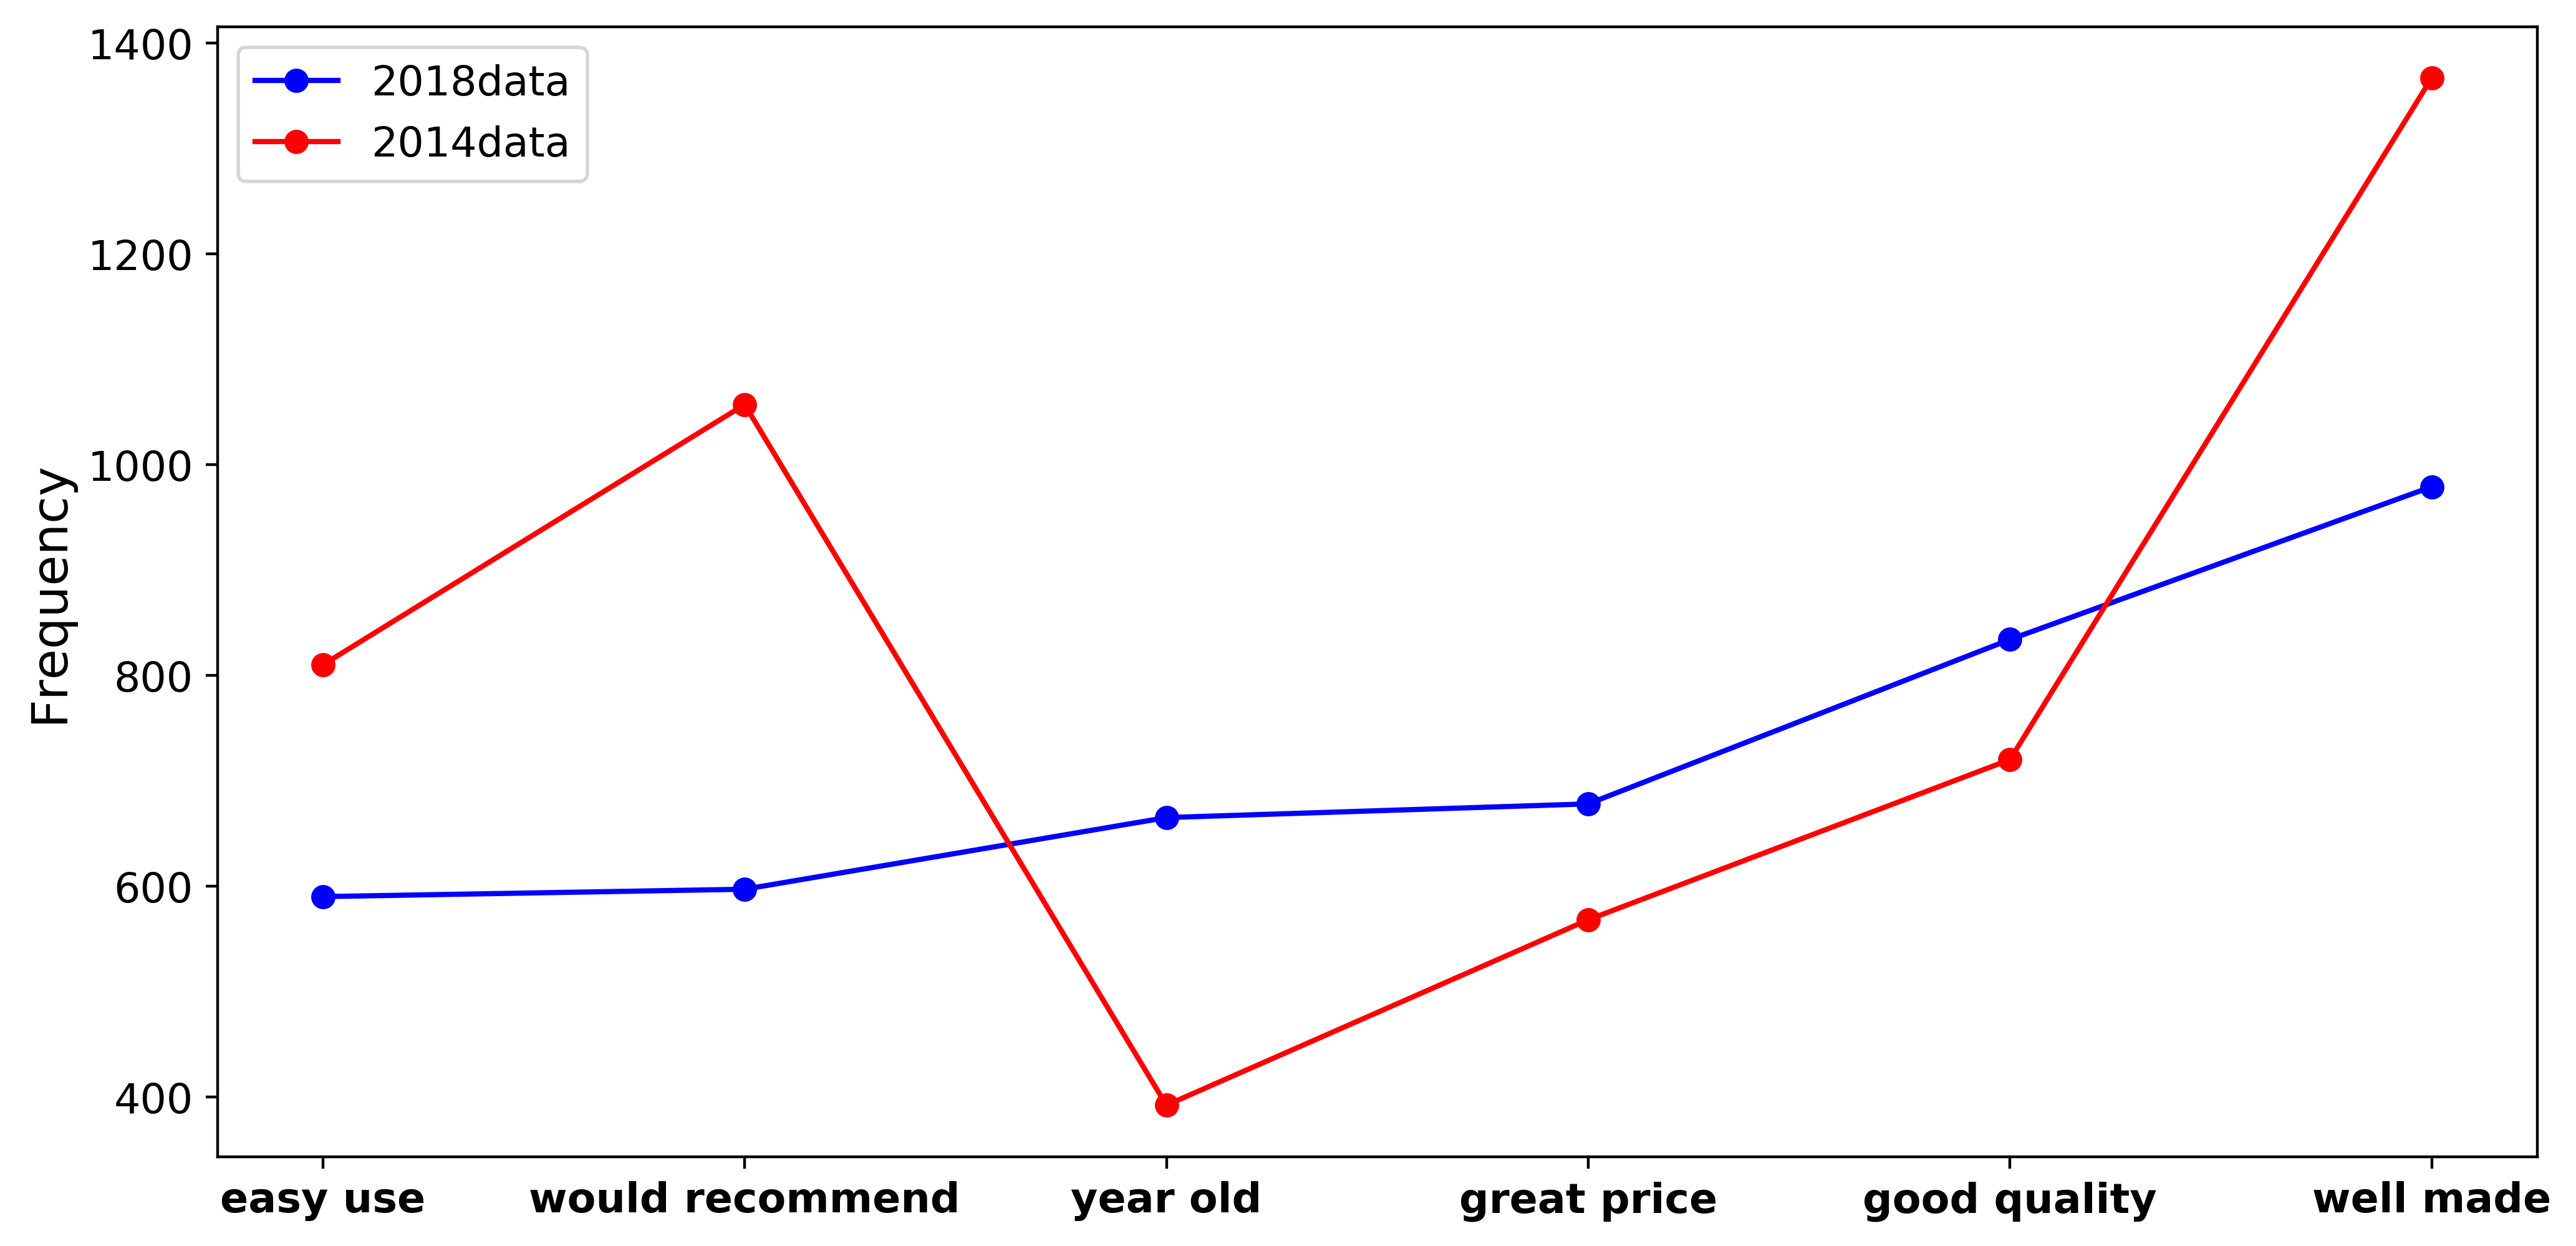

In [45]:
from matplotlib.pylab import subplots
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.dpi'] = 400
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
fig = plt.figure(figsize=(12, 6))
fig.patch.set_alpha(0);
ax = fig.add_subplot(111)
ax.patch.set_alpha(0);
plt.xticks(weight = 'bold')
ax.plot(x,y,'b-o',x_2014,y_2014,'r-o')
ax.legend(('2018data','2014data'),loc='best')
plt.xlabel('')
plt.ylabel('Frequency')